In [1]:
# Import required libraries
import sys
import os

# Add the src directory to path
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))

from config import *
from datasets.table_dataset import PubTabNetDataset
from datasets.transforms.filter import Filter
from datasets.transforms.update import Update
from mmocr.utils import register_all_modules
register_all_modules()

In [2]:
from mmocr.registry import DATASETS
from configs.dbnet_resnet18 import train_dataset
dataset = train_dataset.copy()
dataset['max_data'] = 100
dataset['pipeline'] = None
print(f"\n🔄 Loading Structure dataset...")
dataset = DATASETS.build(dataset)
print(f"✅ Structure dataset loaded successfully: {len(dataset)} samples")
print("✅ Structure dataset ready for use!")


🔄 Loading Structure dataset...
✅ Structure dataset loaded successfully: 100 samples
✅ Structure dataset ready for use!


In [3]:
def print_dict(d, indent=2):
    """Prints a dictionary in a readable format."""
    print(' ' * (indent - 2) + '{')
    for key, value in d.items():
        print(' ' * indent + f"{key}: ", end='')
        if isinstance(value, dict):
            print()
            print_dict(value, indent + 2)
        elif isinstance(value, list):
            if value and all(isinstance(item, dict) for item in value):
                print('[')
                for item in value:
                    print_dict(item, indent + 2)
                print(' ' * indent + ']')
            else:
                print(value)
        else:
            print(value)
    print(' ' * (indent - 2) + '}')

import random
print_dict(dataset[random.randint(0, len(dataset) - 1)])

{
  img_path: F:/data/vitabset/train\143606.png
  sample_idx: 77
  instances: [
  {
    tokens: ['<thead>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '</thead>', '<tbody>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td', ' rowspan="6"', '>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr>', '<tr>', '<td', ' rowspan="5"', '>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '<td>', '</td>', '</tr

In [4]:
from mmocr.registry import TRANSFORMS
from mmengine.dataset import Compose
from configs.dbnet_resnet18 import train_pipeline
pipeline = Compose(train_pipeline)


=== Step 1: Filter ===
Transform: Filter(conditions={'type': 'content'}, input_key='instances', output_key='instances', mode='and')
Before: ['img_path', 'sample_idx', 'instances', 'img_info']
After: ['img_path', 'sample_idx', 'instances', 'img_info']
Modified: ['instances']

=== Step 2: Update ===
Transform: Update(mapping={'bbox_label': 1, 'polygon': <function <lambda> at 0x00000172FF31AD40>, 'ignore': <function <lambda> at 0x00000172FF31AFC0>}, input_key='instances', output_key='instances')
Before: ['img_path', 'sample_idx', 'instances', 'img_info']
After: ['img_path', 'sample_idx', 'instances', 'img_info']
Modified: ['instances']

=== Step 3: LoadOCRAnnotations ===
Transform: LoadOCRAnnotations(with_bbox=True, with_label=True, with_polygon=True, with_text=False, imdecode_backend='cv2', backend_args=None)
Before: ['img_path', 'sample_idx', 'instances', 'img_info']
After: ['img_path', 'sample_idx', 'instances', 'img_info', 'gt_bboxes', 'gt_bboxes_labels', 'gt_polygons', 'gt_ignored']

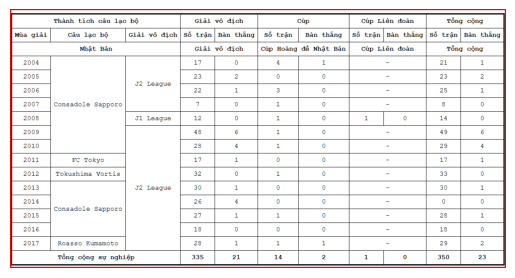


=== Step 5: Resize ===
Transform: Resize(scale=(640, 640), scale_factor=None, keep_ratio=True, clip_object_border=True), backend=cv2), interpolation=bilinear)
Before: ['img_path', 'sample_idx', 'instances', 'img_info', 'gt_bboxes', 'gt_bboxes_labels', 'gt_polygons', 'gt_ignored', 'img', 'img_shape', 'ori_shape']
After: ['img_path', 'sample_idx', 'instances', 'img_info', 'gt_bboxes', 'gt_bboxes_labels', 'gt_polygons', 'gt_ignored', 'img', 'img_shape', 'ori_shape', 'scale', 'scale_factor', 'keep_ratio']
Added: ['scale', 'scale_factor', 'keep_ratio']
Modified: ['gt_bboxes', 'gt_polygons', 'img', 'img_shape']
Image shape: (334, 640, 3)


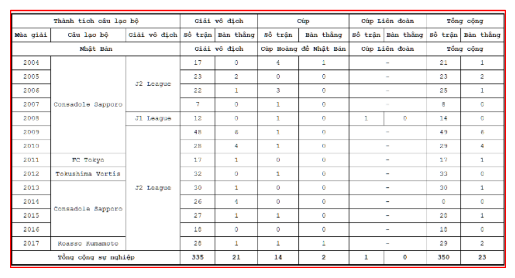


=== Step 6: Pad ===
Transform: Pad(size=(640, 640), size_divisor=None, pad_to_square=False, pad_val={'img': 0, 'seg': 255}), padding_mode=constant)
Before: ['img_path', 'sample_idx', 'instances', 'img_info', 'gt_bboxes', 'gt_bboxes_labels', 'gt_polygons', 'gt_ignored', 'img', 'img_shape', 'ori_shape', 'scale', 'scale_factor', 'keep_ratio']
After: ['img_path', 'sample_idx', 'instances', 'img_info', 'gt_bboxes', 'gt_bboxes_labels', 'gt_polygons', 'gt_ignored', 'img', 'img_shape', 'ori_shape', 'scale', 'scale_factor', 'keep_ratio', 'pad_shape', 'pad_fixed_size', 'pad_size_divisor']
Added: ['pad_shape', 'pad_fixed_size', 'pad_size_divisor']
Modified: ['img', 'img_shape']
Image shape: (640, 640, 3)


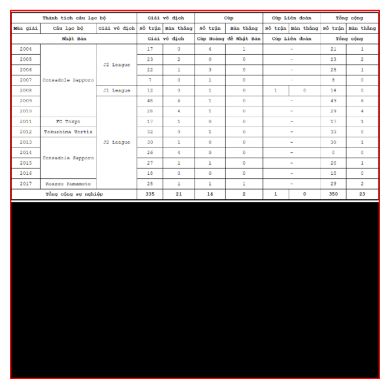


=== Step 7: PackTextDetInputs ===
Transform: PackTextDetInputs(meta_keys=('img_path', 'ori_shape', 'img_shape'))
Before: ['img_path', 'sample_idx', 'instances', 'img_info', 'gt_bboxes', 'gt_bboxes_labels', 'gt_polygons', 'gt_ignored', 'img', 'img_shape', 'ori_shape', 'scale', 'scale_factor', 'keep_ratio', 'pad_shape', 'pad_fixed_size', 'pad_size_divisor']
After: ['inputs', 'data_samples']
Added: ['inputs', 'data_samples']
Removed: ['img_path', 'sample_idx', 'instances', 'img_info', 'gt_bboxes', 'gt_bboxes_labels', 'gt_polygons', 'gt_ignored', 'img', 'img_shape', 'ori_shape', 'scale', 'scale_factor', 'keep_ratio', 'pad_shape', 'pad_fixed_size', 'pad_size_divisor']
Data samples: <TextDetDataSample(

    META INFORMATION
    img_path: 'F:/data/vitabset/train\\143623.png'
    img_shape: (640, 640)
    ori_shape: (615, 1178)

    DATA FIELDS
    gt_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([[ 53.7861,   8.146

In [6]:
import numpy as np
import torch

def is_equal(a, b):
    import numpy as np
    import torch
    if isinstance(a, (np.ndarray, torch.Tensor)) and isinstance(b, (np.ndarray, torch.Tensor)):
        if isinstance(a, torch.Tensor):
            return bool(torch.equal(a, b))
        return bool(np.array_equal(a, b))
    try:
        result = a == b
        # Fix: If result is an array/tensor, reduce to a bool
        if isinstance(result, (np.ndarray, torch.Tensor)):
            return bool(np.all(result))
        return result
    except:
        # If comparison fails, assume not equal
        return False

sample = dataset[random.randint(0, len(dataset) - 1)].copy()
for i, transform in enumerate(pipeline.transforms):
    print(f"\n=== Step {i+1}: {transform.__class__.__name__} ===")
    print(f"Transform: {transform}")
    print(f"Before: {list(sample.keys())}")
    old_sample = sample.copy()
    sample = transform(sample)
    added = {k: v for k, v in sample.items() if k not in old_sample}
    modified = {k: v for k, v in sample.items() if k in old_sample and not is_equal(old_sample[k], v)}
    removed = {k:v for k,v in old_sample.items() if k not in sample}
    print(f"After: {list(sample.keys())}")
    if added: print(f"Added: {list(added.keys())}")
    if modified: print(f"Modified: {list(modified.keys())}")
    if removed: print(f"Removed: {list(removed.keys())}")
    if not added and not modified and not removed: 
        print("No changes made by the transform.")
    # print_dict(sample, indent=2)
    
    # Hiển thị thông tin chi tiết
    if 'img' in sample:
        print(f"Image shape: {sample['img'].shape}")
        import matplotlib.pyplot as plt

        plt.imshow(sample['img'])
        import matplotlib.patches as patches
        ax = plt.gca()
        rect = patches.Rectangle((0, 0), sample['img'].shape[1]-2, sample['img'].shape[0]-2, linewidth=1, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        plt.axis('off')
        plt.show()

    if 'mask' in sample:
        print(f"Mask shape: {sample['mask'].shape}")

    if 'data_samples' in sample:
        print(f"Data samples: {sample['data_samples']}")